In [98]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# For distance between latitude and longtitude calculations
import geopy.distance

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Functions that are used for this analysis

In [2]:
# Function to calculate the distance between the Start and End Stations in Miles
def getDistance(season_df):    
    
    distance_list = []
    for item in season_df.itertuples():
        coords_1 = item[16]
        coords_2 = item[17]
        distance = geopy.distance.vincenty(coords_1, coords_2).miles
        distance_list.append(distance)
    
    season_df['distance(mi)'] = distance_list

In [90]:
def getstartyear(year_df):
    year_df['starttime'] = pd.to_datetime(year_df.starttime)
    new_year_df = year_df.starttime.dt.year

    return(new_year_df)

In [91]:
def getstarttime(year_df):
    year_df['starttime'] = pd.to_datetime(year_df.starttime)
    new_year_df = year_df.starttime.dt.hour

    return(new_year_df)

### Import CSVs

In [13]:
# Import all of the summer data from June 2017 - August 2017
june_2017 = pd.read_csv('june2017.csv')
july_2017 = pd.read_csv('july2017.csv')
august_2017 = pd.read_csv('aug2017.csv')
summer_2017 = june_2017.append([july_2017, august_2017])

summer_2017["start coords"] = list(zip(summer_2017["start station latitude"], summer_2017["start station longitude"]))
summer_2017["end coords"] = list(zip(summer_2017["end station latitude"], summer_2017["end station longitude"]))
#Start Hour Column
summer2017_starthour = getstarttime(summer_2017)
summer_2017['Start Hour'] = summer2017_starthour

getDistance(summer_2017)

summer_2017.head()
summer_2017.to_csv('summer2017.csv') 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start coords,end coords,Start Hour,distance(mi)
0,499,2017-06-01 00:01:39,2017-06-01 00:09:59,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,29590,Subscriber,1979.0,1,"(40.7307426253, -74.063783884)","(40.7253399254, -74.0676221251)",0,0.423763
1,507,2017-06-01 00:06:39,2017-06-01 00:15:07,3211,Newark Ave,40.721525,-74.046305,3277,Communipaw & Berry Lane,40.714358,-74.066611,29453,Subscriber,1969.0,1,"(40.72152515, -74.046304543)","(40.7143583687, -74.0666109324)",0,1.175225
2,768,2017-06-01 00:44:43,2017-06-01 00:57:31,3195,Sip Ave,40.730743,-74.063784,3189,West Side Light Rail,40.714402,-74.088772,26193,Subscriber,1962.0,1,"(40.7307426253, -74.063783884)","(40.714402, -74.0887723)",0,1.729816
3,101,2017-06-01 01:12:55,2017-06-01 01:14:36,3185,City Hall,40.717733,-74.043845,3213,Van Vorst Park,40.718489,-74.047727,29284,Subscriber,1983.0,1,"(40.7177325, -74.043845)","(40.71848892, -74.047726625)",1,0.210368
4,265,2017-06-01 01:14:00,2017-06-01 01:18:25,3273,Manila & 1st,40.721651,-74.042884,3278,Monmouth and 6th,40.725685,-74.048790,29645,Subscriber,1980.0,2,"(40.7216507249, -74.0428841114)","(40.7256854836, -74.0487903357)",1,0.416710


In [14]:
# Import all of the winter data from June 2017 - August 2017
december_2017 = pd.read_csv('dec2017.csv')
january_2017 = pd.read_csv('jan2017.csv')
january_2017.columns = ['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']
february_2017 = pd.read_csv('feb2017.csv')
february_2017.columns = ['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']

winter_2017 = december_2017.append([january_2017, february_2017])

winter_2017["start coords"] = list(zip(winter_2017["start station latitude"], winter_2017["start station longitude"]))
winter_2017["end coords"] = list(zip(winter_2017["end station latitude"], winter_2017["end station longitude"]))

getDistance(winter_2017)

winter_2017.head()
winter_2017.to_csv('winter2017.csv') 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start coords,end coords,distance(mi)
0,452,2017-12-01 00:00:59,2017-12-01 00:08:32,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29607,Subscriber,1988.0,1,"(40.7162469, -74.0334588)","(40.7287448, -74.0321082)",0.865295
1,159,2017-12-01 00:04:42,2017-12-01 00:07:21,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,26269,Subscriber,1992.0,1,"(40.7211236, -74.03805095)","(40.7195861165, -74.0431174636)",0.286366
2,175,2017-12-01 00:17:00,2017-12-01 00:19:55,3186,Grove St PATH,40.719586,-74.043117,3205,JC Medical Center,40.716540,-74.049638,26269,Subscriber,1992.0,1,"(40.7195861165, -74.0431174636)","(40.716539781, -74.0496379137)",0.401718
3,455,2017-12-01 00:50:22,2017-12-01 00:57:57,3194,McGinley Square,40.725340,-74.067622,3191,Union St,40.718211,-74.083639,31929,Subscriber,1990.0,1,"(40.7253399254, -74.0676221251)","(40.7182113, -74.0836394)",0.974186
4,670,2017-12-01 00:55:03,2017-12-01 01:06:13,3194,McGinley Square,40.725340,-74.067622,3189,West Side Light Rail,40.714402,-74.088772,26274,Subscriber,1962.0,1,"(40.7253399254, -74.0676221251)","(40.714402, -74.0887723)",1.342603


In [15]:
# Import all of the spring data from March 2017 - May 2017
march_2017 = pd.read_csv('mar2017.csv')
march_2017.columns = ['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']
april_2017 = pd.read_csv('apr2017.csv')
may_2017 = pd.read_csv('may2017.csv')
spring_2017 = march_2017.append([april_2017, may_2017])


spring_2017["start coords"] = list(zip(spring_2017["start station latitude"], spring_2017["start station longitude"]))
spring_2017["end coords"] = list(zip(spring_2017["end station latitude"], spring_2017["end station longitude"]))

getDistance(spring_2017)

spring2017_starthour = getstarttime(spring_2017)
spring_2017['Start Hour'] = spring2017_starthour

spring_2017.head()
spring_2017.to_csv('spring2017.csv') 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start coords,end coords,distance(mi),Start Hour
0,1076,2017-03-01 00:03:02,2017-03-01 00:20:58,3275,Columbus Drive,40.718355,-74.038914,3207,Oakland Ave,40.737604,-74.052478,26283,Subscriber,1991.0,1,"(40.7183551982, -74.0389144421)","(40.7376037, -74.0524783)",1.507005,0
1,978,2017-03-01 00:09:02,2017-03-01 00:25:20,3220,5 Corners Library,40.734961,-74.059503,3195,Sip Ave,40.730743,-74.063784,24559,Subscriber,1987.0,1,"(40.73496102, -74.0595030785)","(40.7307426253, -74.063783884)",0.367718,0
2,1789,2017-03-01 00:28:11,2017-03-01 00:58:00,3195,Sip Ave,40.730743,-74.063784,3186,Grove St PATH,40.719586,-74.043117,24559,Subscriber,1987.0,1,"(40.7307426253, -74.063783884)","(40.7195861165, -74.0431174636)",1.330277,0
3,613,2017-03-01 00:52:30,2017-03-01 01:02:44,3194,McGinley Square,40.725340,-74.067622,3189,West Side Light Rail,40.714402,-74.088772,26261,Subscriber,1962.0,1,"(40.7253399254, -74.0676221251)","(40.714402, -74.0887723)",1.342603,0
4,2418,2017-03-01 00:54:40,2017-03-01 01:34:59,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,26277,Subscriber,1975.0,1,"(40.7287448, -74.0321082)","(40.7287448, -74.0321082)",0.000000,0


In [16]:
# Import all of the fall data from August 2017 - November 2017
september_2017 = pd.read_csv('sept2017.csv')
october_2017 = pd.read_csv('oct2017.csv')
november_2017 = pd.read_csv('nov2017.csv')
fall_2017 = september_2017.append([october_2017, november_2017])
fall_2017["start coords"] = list(zip(fall_2017["start station latitude"], fall_2017["start station longitude"]))
fall_2017["end coords"] = list(zip(fall_2017["end station latitude"], fall_2017["end station longitude"]))

getDistance(fall_2017)

fall2017_starthour = getstarttime(fall_2017)
fall_2017['Start Hour'] = fall2017_starthour

fall_2017.head()
fall_2017.to_csv('fall2017.csv') 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start coords,end coords,distance(mi),Start Hour
0,364,2017-09-01 00:02:01,2017-09-01 00:08:05,3183,Exchange Place,40.716247,-74.033459,3276,Marin Light Rail,40.714584,-74.042817,29670,Subscriber,1989.0,1,"(40.7162469, -74.0334588)","(40.7145840354, -74.0428170562)",0.504560,0
1,357,2017-09-01 00:08:12,2017-09-01 00:14:09,3187,Warren St,40.721124,-74.038051,3199,Newport Pkwy,40.728745,-74.032108,26163,Subscriber,1980.0,1,"(40.7211236, -74.03805095)","(40.7287448, -74.0321082)",0.611454,0
2,432,2017-09-01 00:10:12,2017-09-01 00:17:24,3195,Sip Ave,40.730743,-74.063784,3280,Astor Place,40.719282,-74.071262,26273,Subscriber,1988.0,1,"(40.7307426253, -74.063783884)","(40.7192822007, -74.0712618828)",0.882874,0
3,934,2017-09-01 00:10:11,2017-09-01 00:25:46,3272,Jersey & 3rd,40.723332,-74.045953,3207,Oakland Ave,40.737604,-74.052478,26297,Subscriber,1991.0,1,"(40.7233315865, -74.0459525585)","(40.7376037, -74.0524783)",1.042684,0
4,932,2017-09-01 00:10:16,2017-09-01 00:25:48,3272,Jersey & 3rd,40.723332,-74.045953,3207,Oakland Ave,40.737604,-74.052478,29247,Subscriber,1993.0,2,"(40.7233315865, -74.0459525585)","(40.7376037, -74.0524783)",1.042684,0


# Peak hours in which bikes are used during summer months

In [40]:
summer_2017.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start coords,end coords,distance(mi),Start Hour
0,499,2017-06-01 00:01:39,2017-06-01 00:09:59,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,29590,Subscriber,1979.0,1,"(40.7307426253, -74.063783884)","(40.7253399254, -74.0676221251)",0.423763,0
1,507,2017-06-01 00:06:39,2017-06-01 00:15:07,3211,Newark Ave,40.721525,-74.046305,3277,Communipaw & Berry Lane,40.714358,-74.066611,29453,Subscriber,1969.0,1,"(40.72152515, -74.046304543)","(40.7143583687, -74.0666109324)",1.175225,0
2,768,2017-06-01 00:44:43,2017-06-01 00:57:31,3195,Sip Ave,40.730743,-74.063784,3189,West Side Light Rail,40.714402,-74.088772,26193,Subscriber,1962.0,1,"(40.7307426253, -74.063783884)","(40.714402, -74.0887723)",1.729816,0
3,101,2017-06-01 01:12:55,2017-06-01 01:14:36,3185,City Hall,40.717733,-74.043845,3213,Van Vorst Park,40.718489,-74.047727,29284,Subscriber,1983.0,1,"(40.7177325, -74.043845)","(40.71848892, -74.047726625)",0.210368,1
4,265,2017-06-01 01:14:00,2017-06-01 01:18:25,3273,Manila & 1st,40.721651,-74.042884,3278,Monmouth and 6th,40.725685,-74.048790,29645,Subscriber,1980.0,2,"(40.7216507249, -74.0428841114)","(40.7256854836, -74.0487903357)",0.416710,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f27de48>]], dtype=object)

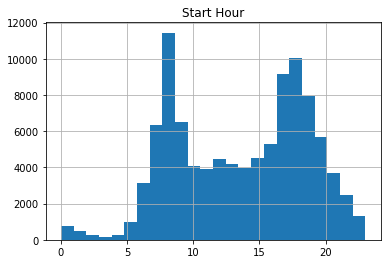

In [41]:
summer_2017.hist(column='Start Hour', range=[0, 23], bins = 24)

# Peak hours in which bikes are used during winter months

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start coords,end coords,distance(mi),Start Hour
0,452,2017-12-01 00:00:59,2017-12-01 00:08:32,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29607,Subscriber,1988.0,1,"(40.7162469, -74.0334588)","(40.7287448, -74.0321082)",0.865295,0
1,159,2017-12-01 00:04:42,2017-12-01 00:07:21,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,26269,Subscriber,1992.0,1,"(40.7211236, -74.03805095)","(40.7195861165, -74.0431174636)",0.286366,0
2,175,2017-12-01 00:17:00,2017-12-01 00:19:55,3186,Grove St PATH,40.719586,-74.043117,3205,JC Medical Center,40.716540,-74.049638,26269,Subscriber,1992.0,1,"(40.7195861165, -74.0431174636)","(40.716539781, -74.0496379137)",0.401718,0
3,455,2017-12-01 00:50:22,2017-12-01 00:57:57,3194,McGinley Square,40.725340,-74.067622,3191,Union St,40.718211,-74.083639,31929,Subscriber,1990.0,1,"(40.7253399254, -74.0676221251)","(40.7182113, -74.0836394)",0.974186,0
4,670,2017-12-01 00:55:03,2017-12-01 01:06:13,3194,McGinley Square,40.725340,-74.067622,3189,West Side Light Rail,40.714402,-74.088772,26274,Subscriber,1962.0,1,"(40.7253399254, -74.0676221251)","(40.714402, -74.0887723)",1.342603,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e776518>]], dtype=object)

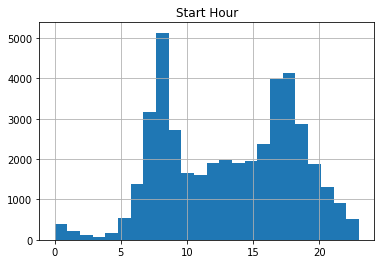

In [42]:
winter_2017.head()
winter_2017.hist(column='Start Hour', range=[0, 23], bins = 24)

# Growth in Total Ridership by season

In [43]:
winter_2017.shape
spring_2017.shape
summer_2017.shape
fall_2017.shape

(42850, 19)

(59353, 18)

(101105, 19)

(91620, 18)

In [17]:
total_riders = [42850,59353,101105,91620]

total_riders_series = pd.Series(total_riders)
total_riders_pctchange = total_riders_series.pct_change()*100

growth_quarters= ['Winter 2017', 'Spring 2017','Summer 2017','Fall 2017']


growth_dic = {
    'quarter': growth_quarters,
    'riders': total_riders,
    'percent_change': total_riders_pctchange
}

growth_df = pd.DataFrame(growth_dic).set_index('quarter').fillna(value=0)
growth_df
growth_df.to_csv('fall2017.csv')

,percent_change,riders
quarter,,
Winter 2017,0.000000,42850
Spring 2017,38.513419,59353
Summer 2017,70.345223,101105
Fall 2017,-9.381336,91620


# Total trips in 2017

In [18]:
total_trips = growth_df['riders'].sum()
print("Total number of trips in 2017: " + str(total_trips))

Total number of trips in 2017: 294928


# Top 10 Stations for starting a journey#
### (Based on the number of rides that started at a given station)

In [99]:
# Combine all the dataframes
all2017_df = winter_2017.append([spring_2017, summer_2017, fall_2017])
all2017_df.head()
all2017_df.to_csv('all2017_df.csv')

,Start Hour,bikeid,birth year,distance(mi),end coords,end station id,end station latitude,end station longitude,end station name,gender,start coords,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype
0,NaN,29607,1988.0,0.865295,"(40.7287448, -74.0321082)",3199,40.728745,-74.032108,Newport Pkwy,1,"(40.7162469, -74.0334588)",3183,40.716247,-74.033459,Exchange Place,2017-12-01 00:00:59,2017-12-01 00:08:32,452,Subscriber
1,NaN,26269,1992.0,0.286366,"(40.7195861165, -74.0431174636)",3186,40.719586,-74.043117,Grove St PATH,1,"(40.7211236, -74.03805095)",3187,40.721124,-74.038051,Warren St,2017-12-01 00:04:42,2017-12-01 00:07:21,159,Subscriber
2,NaN,26269,1992.0,0.401718,"(40.716539781, -74.0496379137)",3205,40.716540,-74.049638,JC Medical Center,1,"(40.7195861165, -74.0431174636)",3186,40.719586,-74.043117,Grove St PATH,2017-12-01 00:17:00,2017-12-01 00:19:55,175,Subscriber
3,NaN,31929,1990.0,0.974186,"(40.7182113, -74.0836394)",3191,40.718211,-74.083639,Union St,1,"(40.7253399254, -74.0676221251)",3194,40.725340,-74.067622,McGinley Square,2017-12-01 00:50:22,2017-12-01 00:57:57,455,Subscriber
4,NaN,26274,1962.0,1.342603,"(40.714402, -74.0887723)",3189,40.714402,-74.088772,West Side Light Rail,1,"(40.7253399254, -74.0676221251)",3194,40.725340,-74.067622,McGinley Square,2017-12-01 00:55:03,2017-12-01 01:06:13,670,Subscriber


In [100]:
top_10_starting_stations_names = ['Grove St PATH','Exchange Place','Hamilton Park','Sip Ave','Newport PATH','Morris Canal','Warren St','City Hall','Newport Pkwy','Newark Ave'] 
# List of value counts in 'start station name' column
top_10_starting_stations = all2017_df['start station name'].value_counts().head(10).tolist()

count = ['Number of Trips']

top_10_starting_stations_df = pd.DataFrame(top_10_starting_stations, columns=count, index= top_10_starting_stations_names)
top_10_starting_stations_df
top_10_starting_stations_df.to_csv('top10startingstations.csv')

,Number of Trips
Grove St PATH,35856
Exchange Place,19810
Hamilton Park,19393
Sip Ave,15598
Newport PATH,12516
Morris Canal,12251
Warren St,9206
City Hall,9035
Newport Pkwy,9031
Newark Ave,8610


# Top 10 Stations for ending a journey#
### (Based on the number of rides that ended at a given station)

In [21]:
top_10_ending_stations_names = ['Grove St PATH',  
'Exchange Place',   
'Hamilton Park',    
'Sip Ave',          
'Newport PATH',     
'Morris Canal',     
'Warren St',        
'City Hall',        
'Newport Pkwy',     
'Newark Ave']
# List of value counts in 'start station name' column


top_10_ending_stations = all2017_df['end station name'].value_counts().head(10).tolist()

count = ['count']

top_10_ending_stations_df = pd.DataFrame(top_10_ending_stations, columns=count, index= top_10_ending_stations_names)
top_10_ending_stations_df
top_10_ending_stations_df.to_csv('top10endingstations.csv')



,count
Grove St PATH,44940
Exchange Place,23912
Hamilton Park,17714
Sip Ave,14118
Newport PATH,13400
Morris Canal,10369
Warren St,9210
City Hall,8848
Newport Pkwy,8460
Newark Ave,8302


# Bottom 10 Stations for starting a journey#
### (Based on the number of rides that started at a given station)

In [22]:
bottom_10_starting_stations = all2017_df['start station name'].value_counts().tail(10)
print(bottom_10_starting_stations)

Journal Square          666
Union St                606
NJCU                    416
West Side Light Rail    323
Columbia Park           256
MLK Light Rail          245
Danforth Light Rail     238
Bayside Park            182
Bethune Center           61
JCBS Depot                7
Name: start station name, dtype: int64


# Bottom 10 Stations for ending a journey#
### (Based on the number of rides that ended at a given station)

In [23]:
bottom_10_ending_stations = all2017_df['end station name'].value_counts().tail(10)
print(bottom_10_ending_stations)

Allen St & Rivington St      1
Amsterdam Ave & W 73 St      1
Indiana                      1
Bus Slip & State St          1
Cathedral Pkwy & Broadway    1
W 70 St & Amsterdam Ave      1
W 42 St & Dyer Ave           1
W 4 St & 7 Ave S             1
W 22 St & 10 Ave             1
LaGuardia Pl & W 3 St        1
Name: end station name, dtype: int64


# Gender breakdown of active participants (1 - Male v. 2 - Female)

In [24]:
gender_count = all2017_df['gender'].value_counts().tolist()
columns = ['count']
index = ['male','female', 'unknown']
gender_count_df = pd.DataFrame(data = gender_count,index = index, columns = columns)
gender_count_df.to_csv('gendercount.csv')
gender_count_df

,count
male,212709
female,61294
unknown,20925


# Average trip duration change by age

In [25]:
all2017_df['age'] = 2018 - all2017_df['birth year']

In [45]:
# To verify that there are two unique ages over 100
all2017_df[all2017_df.age >= 100].nunique()

Start Hour                 18
bikeid                     57
birth year                  2
distance(mi)               20
end coords                 12
end station id             12
end station latitude       12
end station longitude      12
end station name           12
gender                      3
start coords               13
start station id           13
start station latitude     13
start station longitude    13
start station name         13
starttime                  70
stoptime                   70
tripduration               64
usertype                    2
age                         2
dtype: int64

In [51]:
# There are 2 outliers in ages(118 and 131)
#Check dataframe above to see if this is unlikely information

avg_df = all2017_df[['age','tripduration']]
#Drop ages that are over 100 because they are MOST LIKELY not riding bikes at this age
avg_df = avg_df.drop(avg_df[avg_df.age >= 100].index)
avg_df.groupby('age')['tripduration'].mean() 

age
17.0    1552.454545
18.0    1408.818182
19.0     715.602740
20.0    9865.614108
21.0     663.783854
22.0    2133.015929
23.0     762.428767
24.0     556.784321
25.0     555.241719
26.0     476.760677
27.0     593.384924
28.0     521.676137
29.0     501.606975
30.0     503.097893
31.0     576.641059
32.0     464.622982
33.0     583.655707
34.0     507.722893
35.0     546.810200
36.0     489.946280
37.0     523.895648
38.0     611.236287
39.0     739.425975
40.0     564.252063
41.0     548.654781
42.0     585.413771
43.0     617.878348
44.0     481.583082
45.0     563.682564
46.0     479.225918
           ...     
49.0     628.490068
50.0     558.653740
51.0     545.699917
52.0     719.634395
53.0    1238.381275
54.0     559.312548
55.0     659.989587
56.0     690.736579
57.0     600.072034
58.0     582.771067
59.0     623.922920
60.0     513.136797
61.0     418.100309
62.0     467.177062
63.0     423.713873
64.0     576.129202
65.0     669.536434
66.0     619.956140
67.0     707.920

In [53]:
# Create the bins in which Data will be held
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create the names for the four bins
group_names = ['<10', '11-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80','81-90','91-100']

In [57]:
# Cut dataframe and place the scores into bins
avg_df["age_group"] = pd.cut(avg_df["age"], bins, labels=group_names)
avg_df.head()

,age,tripduration,age_group
0,30.0,452,21-30
1,26.0,159,21-30
2,26.0,175,21-30
3,28.0,455,21-30
4,56.0,670,51-60


In [64]:
avg_df_agegroup = avg_df.groupby('age_group')['tripduration'].mean().fillna(0)
avg_df_agegroup = pd.DataFrame(avg_df_agegroup)
avg_df_agegroup

,tripduration
age_group,
<10,0.000000
11-20,7145.541787
21-30,554.045525
31-40,548.984860
41-50,570.194208
51-60,672.880179
61-70,509.710206
71-80,785.564593
81-90,238.517615


<Container object of 10 artists>

Text(0,0.5,'Average Trip Duration')

Text(0.5,1,'Average Trip Duration by Age Group')

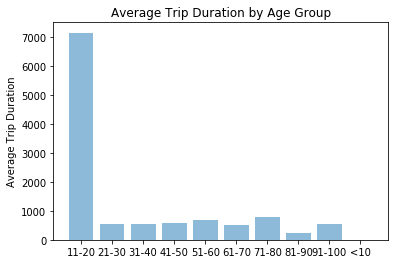

In [68]:
plt.bar(avg_df_agegroup.index, avg_df_agegroup['tripduration'], align='center', alpha=0.5)
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Age Group')
 
plt.show()

# Average distance that a bike is ridden

In [149]:
avg_distance = all2017_df['distance(mi)'].mean()
print("Average Distance that a bike is ridden: " + str(avg_distance) + " miles")

Average Distance that a bike is ridden: 14.974136130083679 miles


# Bikes that need to be repaired or at the very least inspected
## Based on the distance each bike has travelled
According to https://bicyclehabitat.com/, a bike should be repaired every 6,000 miles.

In [72]:
bike_repair_df = all2017_df[['bikeid', 'distance(mi)']]
bike_repair_df.head()

,bikeid,distance(mi)
0,29607,0.865295
1,26269,0.286366
2,26269,0.401718
3,31929,0.974186
4,26274,1.342603


In [97]:
bike_repair_df_sum = bike_repair_df.groupby('bikeid')['distance(mi)'].sum()
bike_repair_df_sum = pd.DataFrame(bike_repair_df_sum)
#sort and drop values that are less than 6000 mi
bike_repair_df_sum.sort_values('distance(mi)', ascending=False).drop(bike_repair_df_sum[bike_repair_df_sum['distance(mi)'] <= 6000].index)


,distance(mi)
bikeid,
26222,38122.397275
26163,32706.300519
29479,32620.055441
26317,32606.582702
26285,27413.470143
26184,27359.402976
26267,27302.332659
26210,27293.656455
29618,27291.427951
